In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import albumentations as A
import numpy.typing as npt
import pandas as pd
import albumentations.core.bbox_utils as bu
from src import annotation_extractor as an_ext
from src import constants as c
import src.image_processing as improc
import src.utils as u

In [2]:
img = cv2.imread(r'D:\0-Code\PG\2_sem\0_Dyplom\ai-capstone-proj\examples\image_0000005.jpg', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
img.shape

(2856, 1904, 3)

In [4]:
df: pd.DataFrame = an_ext.xml_annotations_to_dataframe('examples')

bboxes = df[['xmin', 'ymin', 'xmax', 'ymax']].to_numpy()
bboxes_alb = bu.convert_bboxes_to_albumentations(bboxes, 'pascal_voc', img.shape)
label_columns_list = c.defect_names
label_vals = [tuple(x) for x in df[list(label_columns_list)].to_numpy()]

In [5]:
def process_images_in_folder(input_folder: str, output_folder: str, 
                             annotations_df: pd.DataFrame):
    files = [f.name for f in os.scandir(input_folder)]
    for file_name, data in annotations_df.groupby('img')[list(c.columns_list[1:])]:
        if file_name not in files:
            print(f'{file_name} doesn\'t exist in folder {input_folder}')
            continue
        file_path = os.path.join(input_folder, file_name)
        bboxes = []
        multi_hot_encoded_labels = []
        
        for d in data:
            bboxes.append(d[c.bbox_coordinate_names].to_numpy())
            multi_hot_encoded_labels.append(d[c.defect_names])

        augumented_images = improc.generate_augmented_images(image_path=file_path, bounding_boxes=bboxes, bbox_coord_format='pascal_voc',
                                                             label_values=multi_hot_encoded_labels, resize=True, target_width=512, target_height=512)

In [13]:
def augment_image_and_save_to_folder(input_file_path: str, output_folder: str, data: pd.DataFrame) -> list[dict]:
    bboxes = []
    multi_hot_encoded_labels = []

    for d in data:
        bboxes.append(d[c.bbox_coordinate_names].to_numpy())
        multi_hot_encoded_labels.append(d[c.defect_names])

    augmented_images: list[improc.ImageAugumentor] = improc.generate_augmented_images(image_path=input_file_path, bounding_boxes=bboxes, bbox_coord_format='pascal_voc',
                                                                                      label_values=multi_hot_encoded_labels, resize=True, target_width=512, target_height=512)

    out_dict_list = []
    for augmented_image in augmented_images:
        cv2.imwrite(os.path.join(output_folder, augmented_image.processed_image_name), augmented_image.processed_image)
        out_dict_list.append(augmented_image.metadata_dict)

    return out_dict_list

in_fpath = os.path.join(os.getcwd(), 'image_0000005.jpg')

out_f = r'D:\0-Code\PG\2_sem\0_Dyplom\ai-capstone-proj\examples\augumented'

augment_image_and_save_to_folder(in_fpath, out_f, df)

TypeError: string indices must be integers, not 'list'

In [14]:
sadasd = []
sadasd.append(df[c.bbox_coordinate_names].to_numpy())

In [38]:

file_path = f'{os.getcwd()}/image_0000005.jpg'
file_path = os.path.join(os.getcwd(), 'image_0000005.jpg')
print(file_path)

d:\0-Code\PG\2_sem\0_Dyplom\ai-capstone-proj\image_0000005.jpg


In [ ]:
def is_image_in_folder(folder: str, image: str):
    

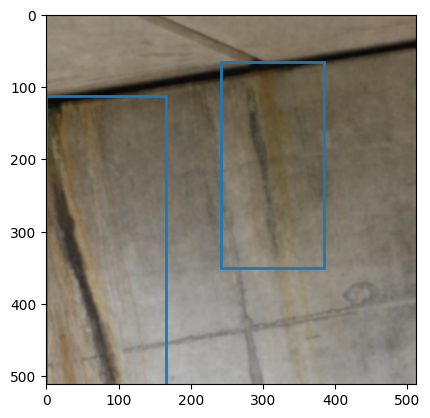

In [15]:
aug_img = improc.ImageAugumentor(r'examples\image_0000005.jpg',
                                 bounding_boxes=bboxes_alb,
                                 label_values=label_vals)

aug_img.resize()
aug_img.apply_augumentations()
aug_img.plot_processed_img_with_bboxes()


In [7]:
bboxes

array([['661', '472', '992', '1857'],
       ['1507', '505', '1904', '2856']], dtype=object)

In [8]:
aug_img.processed_bboxes_pascal_voc

array([[222.93833923,  70.99845886, 371.34393311, 392.77713013],
       [  0.        ,  18.6957531 , 114.82645416, 512.        ]])

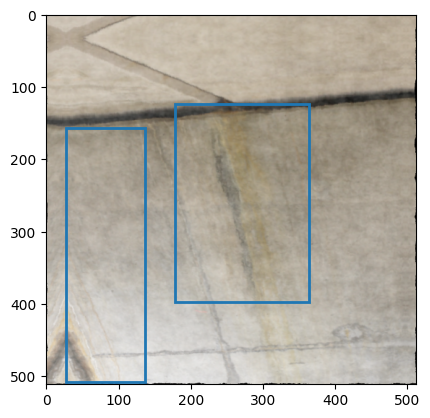

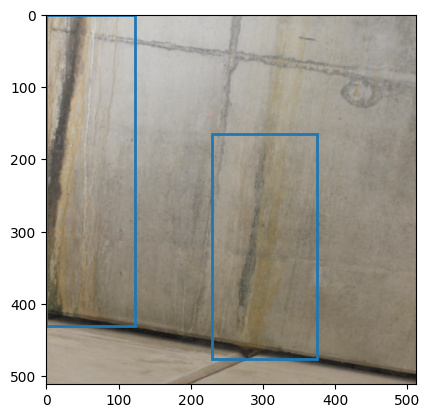

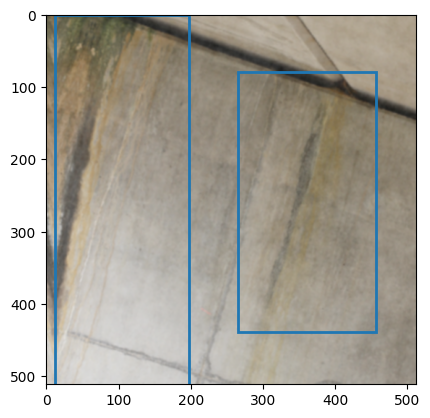

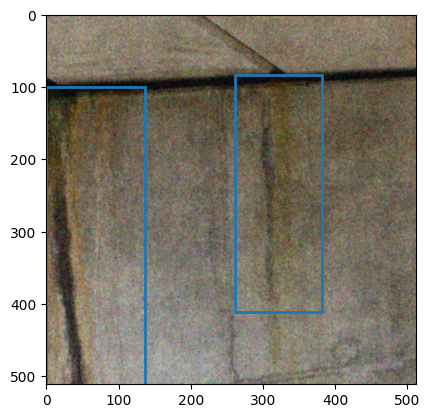

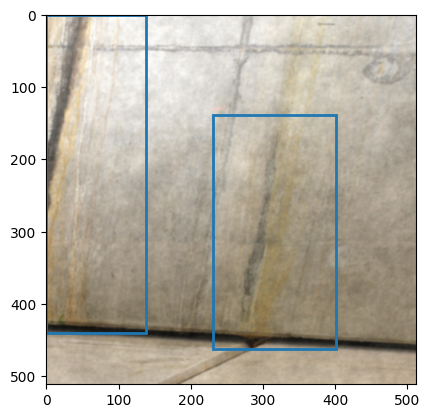

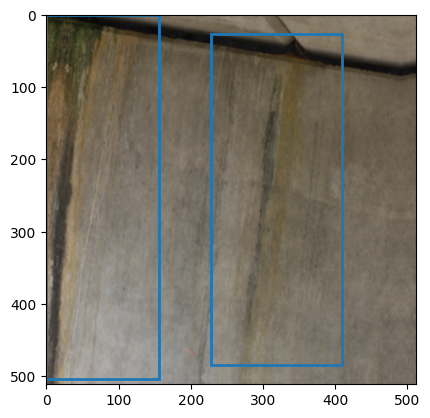

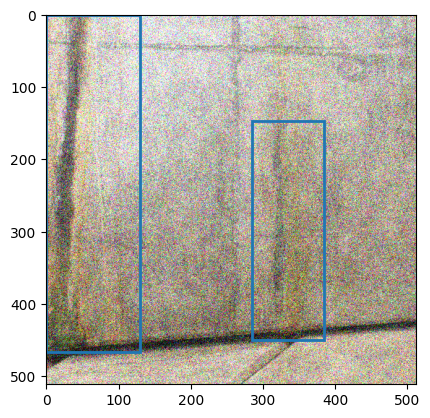

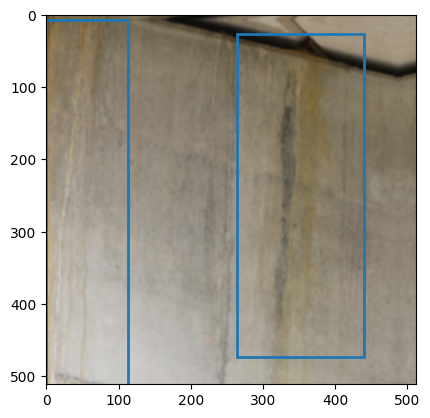

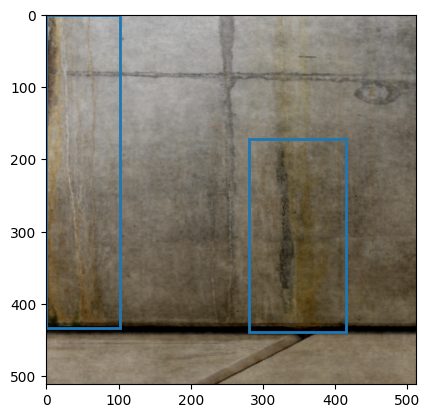

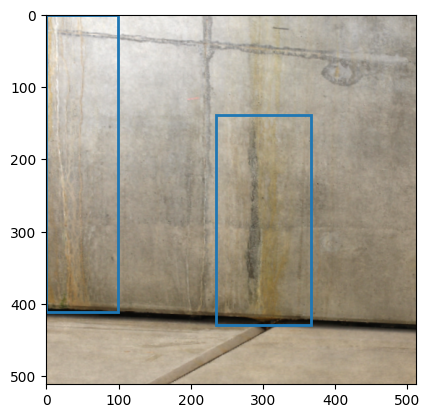

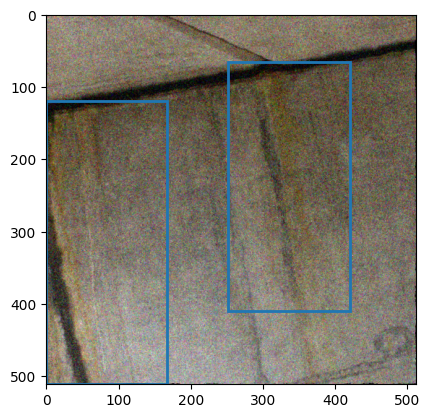

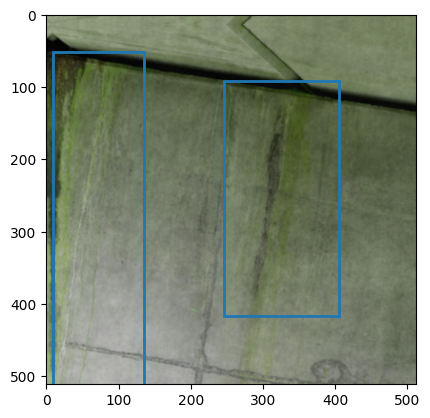

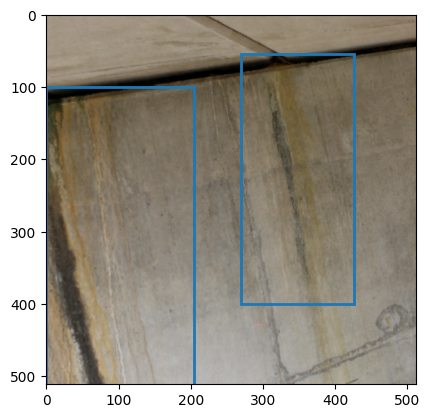

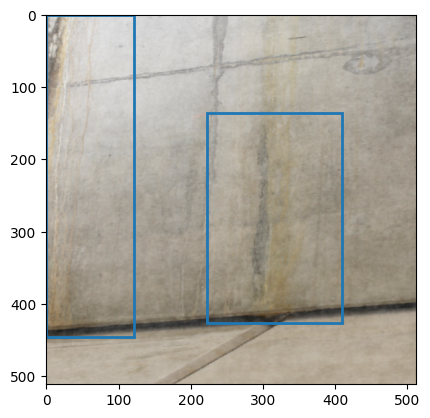

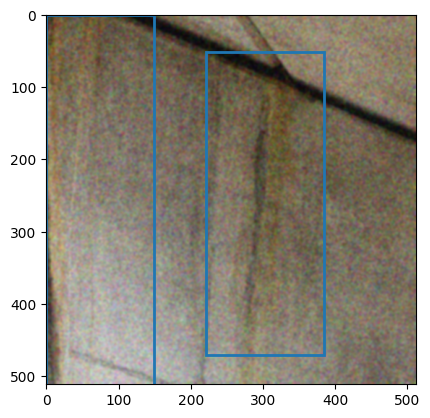

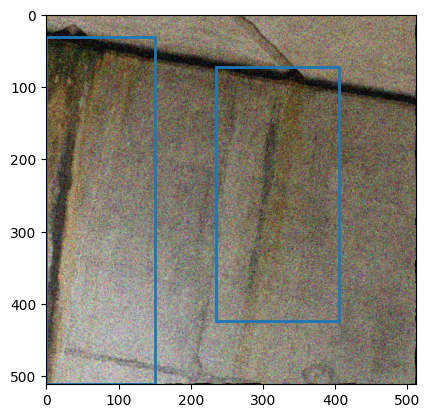

In [14]:
# imgs: list[improc.ImageAugumentor] = improc.generate_augumented_images('examples/image_0000005.jpg', bboxes_alb,
#                                   bbox_coord_format='albumentations', label_values=label_vals, num_augmentations=16)

# for i in imgs:
#     i.plot_processed_img_with_bboxes()

In [10]:
imgs[0].processed_image_name

In [11]:
imgs[0]._augmented_out_bboxes

array([[0.4552685 , 0.16862214, 0.73739308, 0.88577248],
       [0.        , 0.        , 0.28756708, 0.76417127]])

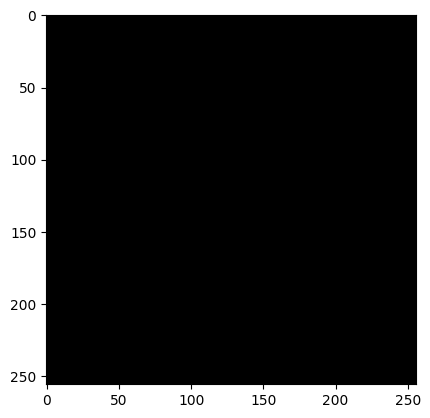

In [12]:
import albumentations as A
import numpy as np

# Define the Affine transformation with correct translate_percent parameter
affine_transform = A.Affine(translate_percent=np.random.uniform(5, 10), p=0.4)

# Alternatively, you can use a tuple for translate_percent
# affine_transform = A.Affine(translate_percent=(np.random.uniform(5, 10), np.random.uniform(5, 10)), p=0.4)

# Example usage within a pipeline
pipeline = A.Compose([
    affine_transform
])

# Example image and bounding boxes
image = np.random.randint(0, 256, (256, 256, 3), dtype=np.uint8)
bboxes = [[10, 10, 100, 100]]

# Apply the transformation
augmented = pipeline(image=image)

# Display the augmented image
import matplotlib.pyplot as plt
plt.imshow(augmented['image'])
plt.show()
